# Data Collection and Plotting

In [16]:
# R package which includes Quantitative Financial Modelling Frameworks.
#https://www.rdocumentation.org/packages/quantmod
#install.packages("quantmod")
require(quantmod)

# An R package for Wavelet analysis and reconstruction of time series, 
# cross-wavelets and phase-difference (with filtering options), 
# significance with simulation algorithms.
# https://www.rdocumentation.org/packages/WaveletComp/versions/1.0
#install.packages("WaveletComp")
require(WaveletComp)

# An R Package of time series tools and utilities; Rmetrics - Financial Time Series Objects
#https://www.rdocumentation.org/packages/timeSeries
#install.packages("timeSeries")
require(timeSeries)

# An R package with a collection of econometric functions for performance and risk analysis
#https://www.rdocumentation.org/packages/PerformanceAnalytics
#install.packages("PerformanceAnalytics")
require(PerformanceAnalytics)

# biwavelet: Conduct Univariate and Bivariate Wavelet Analyses
# https://www.rdocumentation.org/packages/biwavelet
#install.packages("biwavelet")
require(biwavelet)

[1] "CGW" "XLE" "SPY"

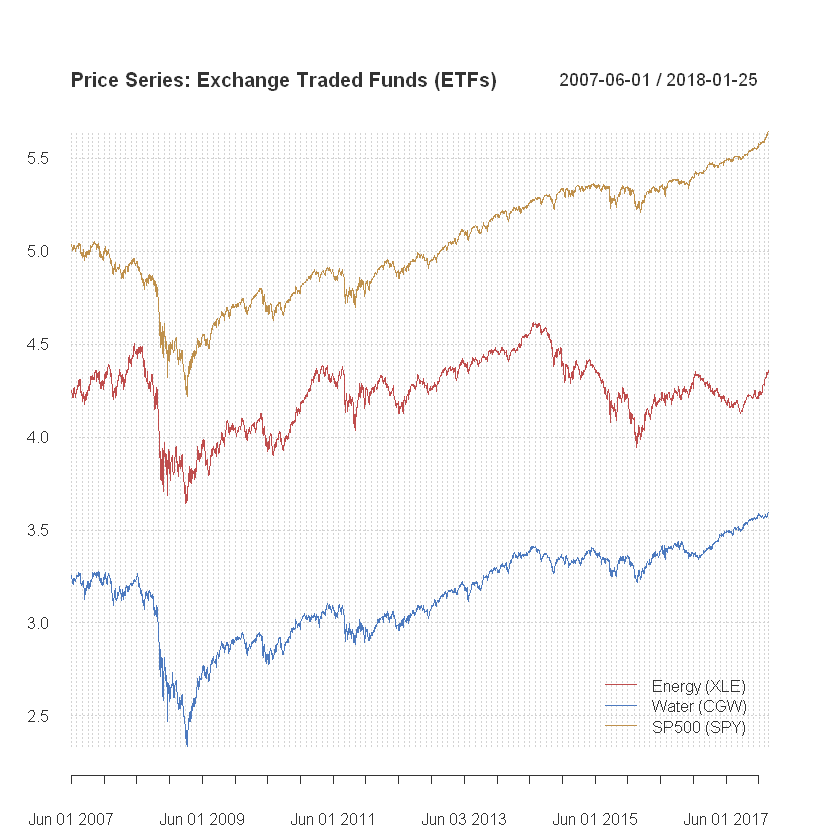

In [11]:
# Identify the tickers of interest
tickers <- c("CGW","XLE", "SPY")
# Download these tickers from Yahoo for the dates in the presentation
getSymbols(tickers,src="yahoo", from = "2007-06-01",to = "2018-01-26")
# Merge all the Price series into one dataframe
AllPrices <- do.call(merge, lapply(tickers, function(x) get(x)))

#Some of these series have (NA) missing values for dates when others 
# do not have missiong vaulesin the series so we interpolate for these values
AllPrices$CGW.Close <- interpNA(AllPrices$CGW.Close)
AllPrices$XLE.Close <- interpNA(AllPrices$XLE.Close)
AllPrices$SPY.Close <- interpNA(AllPrices$SPY.Close)

#Plot the log prices
price.pair <- log(cbind(AllPrices$XLE.Close ,AllPrices$CGW.Close, AllPrices$SPY.Close))
colnames(price.pair) <- c("Energy (XLE)", "Water (CGW)", "SP500 (SPY)")
key.dates <- c("2007-08-09","2011-04-01","2014-07-01", "2016-01-04"); 
key.labels <- c("Start of Financial Crisis: Seizure in the banking system", 
                "End of Financial Crisis (Peak)", "Start of Oil Glut (Peak)", "End of Oil Glut (Trough)")
#2007-08-09: Seizure in the banking system
chart.TimeSeries(price.pair, colorset = rainbow10equal[c(1,7,2)], 
                 legend.loc = "bottomright", ylab = "Prices (logscale)", 
                 main = "Price Series: Exchange Traded Funds (ETFs)", las = 3, 
                 lwd = 0.5, cex.main = 1.5, cex.legend = 0.9, pch = " ", cex.labels = 0.8, 
                 lty = c(1,1,1),event.lines = key.dates, event.labels = key.labels, 
                 event.color = c("darkslategrey", "darkslategrey", "darkslategrey", "darkslategrey"))


# Wavelet Analysis (CWT Power Spectrum)

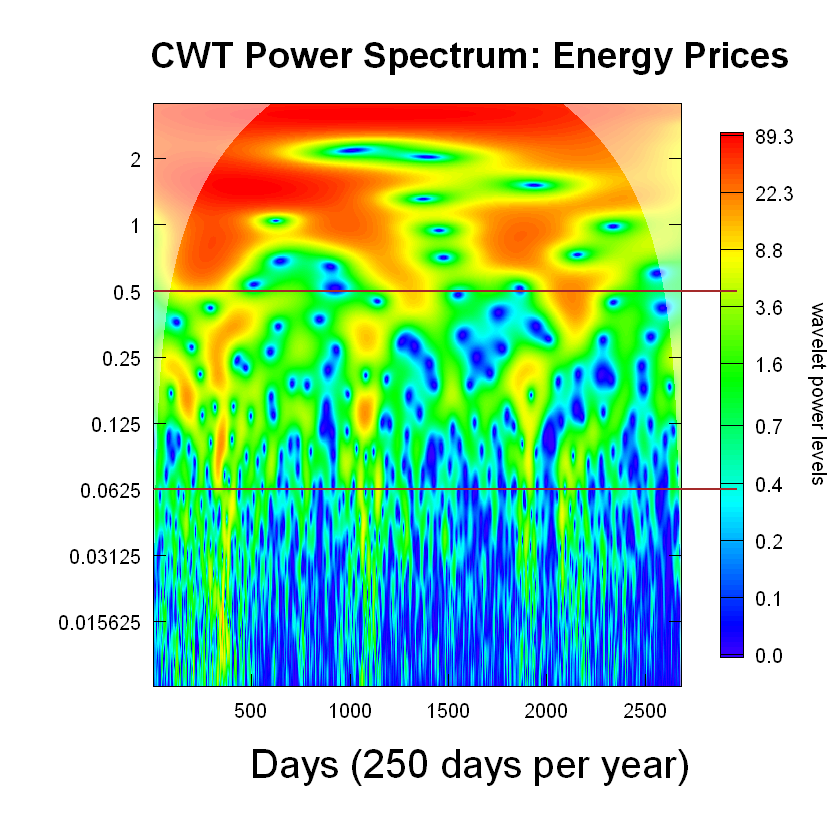

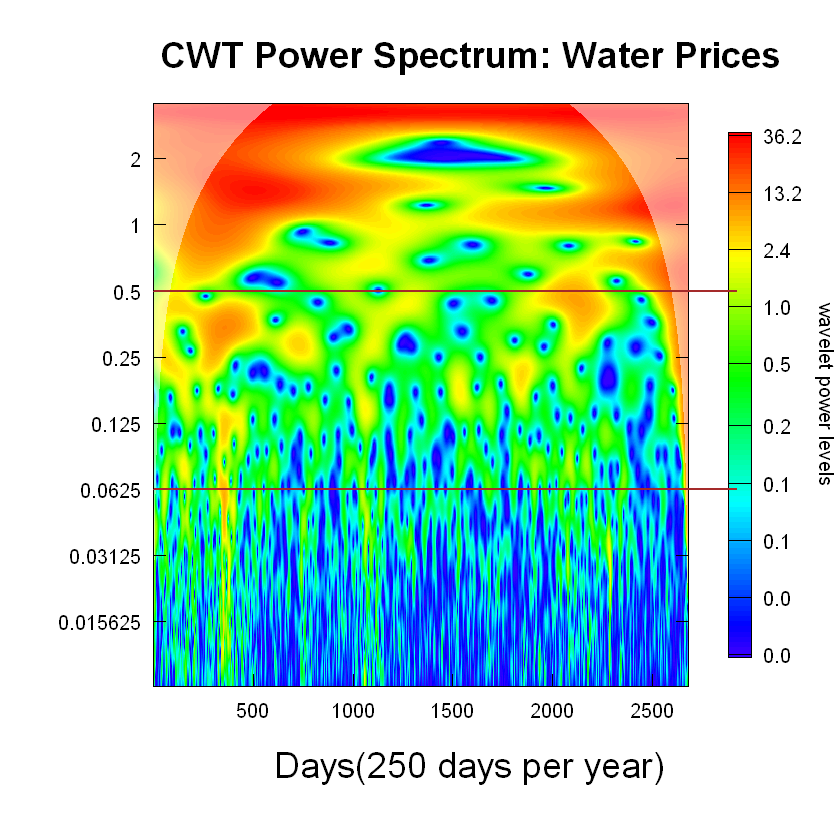

In [18]:
#Set up the correct data frame
rCGW <- as.data.frame((AllPrices$CGW.Close))
rXLE <- as.data.frame((AllPrices$XLE.Close))
rSPY <- as.data.frame((AllPrices$SPY.Close))

#Retrieve specific dates
date1 <- index(AllPrices)
#save Prices in Matrix
rW <- cbind(1:(length(AllPrices$CGW.Close)), rCGW$CGW.Close[1: length(AllPrices$CGW.Close)])
rE <- cbind(1:(length(AllPrices$XLE.Close)), rXLE$XLE.Close[1: length(AllPrices$XLE.Close)])
rS <- cbind(1:(length(AllPrices$SPY.Close)), rSPY$SPY.Close[1: length(AllPrices$SPY.Close)])

#Continuous Wavelet Transform (CWT) Power Spectrum of the Energy Series
my.data.E = data.frame(x = rE[,2]) 
my.E = analyze.wavelet(my.data.E, "x", loess.span = 0, dt = 1/250, dj = 1/64, make.pval = F, verbose = F, n.sim = 1000)
#1/dt = number of intervals per time unit #sampling resolution on time domain
#1/dj = number of suboctaves (voices per octave) #sampling resolution on frequency domain
par(mar=c(6,6,4,2)+0.1)
wt.image(my.E, periodlab = " ",timelab = "  " , main = " ",
         legend.params = list(lab = "wavelet power levels", mar = 5.1, cex = 6, n.ticks = 10), 
         color.key = "quantile", lwd = 2, plot.ridge = FALSE)
clip(0,0.92,0,1)
abline(h = 0.338, col = "brown", lty = 1, lwd = 2)
abline(h = 0.678, col = "brown", lty = 1, lwd = 2)
title("CWT Power Spectrum: Energy Prices", cex.main = 1.8, xlab = "Days (250 days per year)", ylab = " ", cex.lab = 2)

#Continuous Wavelet Transform (CWT) Power Spectrum of the Water Series
my.data.W = data.frame(x = rW[,2]) 
my.W = analyze.wavelet(my.data.W, "x", loess.span = 0, dt = 1/250, dj = 1/64, make.pval = F, verbose = F, n.sim = 1000)
par(mar=c(6,6,4,2)+0.1)
wt.image(my.W, periodlab = " ",timelab = " ", main = " ",
         legend.params = list(lab = "wavelet power levels", mar = 4.7, n.ticks = 10), 
         color.key = "quantile", lwd = 2,  plot.ridge = FALSE)
clip(0,0.92,0,1)
abline(h = 0.338, col = "brown", lty = 1, lwd = 2)
abline(h = 0.678, col = "brown", lty = 1, lwd = 2)
title("CWT Power Spectrum: Water Prices", cex.main = 1.8, xlab = "Days(250 days per year)", ylab = " ", cex.lab = 1.8)

# Wavelet Coherence Plot Water and Energy

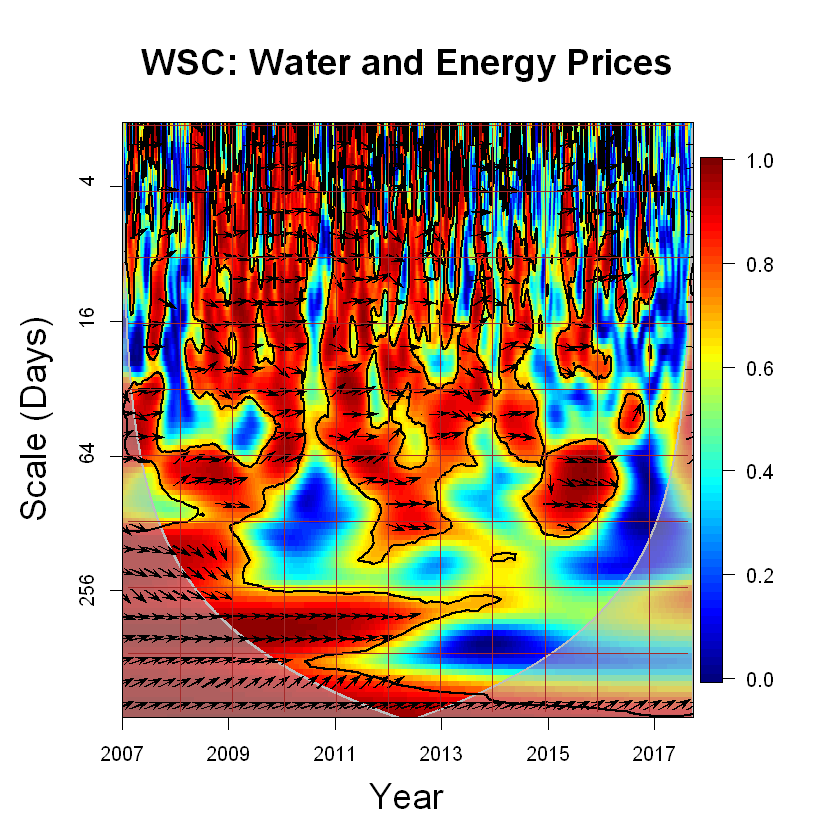

In [19]:
#Wavelet Coherence Plot Water and Energy
wtc.rWE=wtc(rW, rE, quiet = TRUE, nrands = 100)
wtc.rWE$xaxis <- date1
par(oma=c(0, 0, 0, 1), mar=c(5, 5, 5, 5) + 0.1)
plot(wtc.rWE, plot.cb=TRUE, plot.phase=TRUE, xlab = "Year", ylab = "Scale (Days)", 
     cex = 1.6, lty.coi = 1, col.coi = "grey", lwd.coi = 2, 
     lwd.sig = 2, cex.lab = 1.8)
n = length(rW[, 1])
abline(v = seq(250, n, 250), h = 1:16, col = "brown", lty = 1, lwd = 1)
title("WSC: Water and Energy Prices", cex.main = 1.8)